## Context and Background

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective: 

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

## Dataset:

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to build Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

## Examining and Inspecting the dataset

### Read the dataset

In [2]:
loan_df = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another varaible to avoid any changes to original data
data = loan_df.copy()

<IPython.core.display.Javascript object>

##### View the first and  last 5 rows of the dataset.

In [5]:
data.head()  # first 5 rows of the dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [6]:
data.tail()  # last 5 rows of the dataset

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

#### Comments:
* The target column is the Personal_Loan attribute which specifies if the customer has taken a loan or not.
* The ID variable is in serial order, unique value to the dataset and shows no relationship with the target variable. Attribute will need to be dropped in the data prep phase.
* Zip Code is a nominal variable that needs to be mapped to the county dimension
* Ordinal Categorical variables are Family and Education 
* Binary categorical variables are CD_Account, Security_Account, Online, Credit_card. This needs to be transformed to categorical data types.
* Age, Experience, Income, CCAvg and Mortgage are interval variables 


#### Rearranging of the target variable to appear as the last column of the data set

In [7]:
p_loan = data["Personal_Loan"]
data.drop(["Personal_Loan"], axis=1, inplace=True)
data["Personal_Loan"] = p_loan
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0

<IPython.core.display.Javascript object>

##### Checking the shape of the dataset 

In [8]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset consists of 5000 rows and 14 columns

##### Check the data types of the columns in the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal_Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

##### Comments:
* No categorical, object or boolen variables. However, the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable and needs to be transformed.
* Dataset consists of 1 float data type and 13 integers. 

##### Check for duplicates in the data set 

In [10]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Personal_Loan         0
dtype: int64

<IPython.core.display.Javascript object>

* No duplicates found in the dataset

##### Check for missing values 

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Personal_Loan         0
dtype: int64

<IPython.core.display.Javascript object>

* Also no missing values in the data set

##### Summary of the dataset 

In [12]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0  
Personal_Loan           0.0      0.00      1.0

<IPython.core.display.Javascript object>

##### Comments:
* Age seems to be normally distirbuted as the mean and median are almost of same value. Age mean is 45 and the range is between 23 years - 67 years.
* Experience also similar as Age seems to have a normal distirbution. However the minimum experience is -3years which indicates an error issue because years of experience can't be negative 
* Average income is approximately \\$74. The income range is between \\$8 - \\$224. Attribute is skewed to the right. Presence of some outlier.
* CCAVG has mean of 1.93. Range is from 0 -10. Data is skewed to the right.
* Majority of the customers have no mortgage. Distribution is heavily skewed to right
* Categorical variables such as Family, Education,Personal loan, security_account, cd_account,online and credit card all have clean records

### Fixing the experience error and decoding the ZipCodes into county dimensions

In [13]:
neg_experience = data["Experience"] < 0
neg_experience.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
data["Experience"] = data["Experience"].apply(abs)

<IPython.core.display.Javascript object>

In [15]:
data[data["Experience"] < 0][
    "Experience"
].value_counts()  ###checking for negative values

Series([], Name: Experience, dtype: int64)

<IPython.core.display.Javascript object>

In [16]:
from uszipcode import SearchEngine

search = SearchEngine()

county = []

for i in np.arange(0, len(data["ZIPCode"])):
    zipcode = search.by_zipcode(data["ZIPCode"][i])
    if zipcode is not None:
        county.append(zipcode.county)
    else:
        county.append("NoMatch")

data["County"] = county
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  \
0                   1           0       0           0              0   
1                   1           0       0           0              0   
2                   0           0       0           0              0   
3                   0           0       0           0              0   
4                   0           0       0           1              0   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

<IPython.core.display.Javascript object>

In [17]:
cat_columns = [
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "Personal_Loan",
    "County",
]
for i in cat_columns:
    print(data[i].value_counts(normalize=True))
    print("-" * 50)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
--------------------------------------------------
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
--------------------------------------------------
0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64
--------------------------------------------------
0    0.9396
1    0.0604
Name: CD_Account, dtype: float64
--------------------------------------------------
1    0.5968
0    0.4032
Name: Online, dtype: float64
--------------------------------------------------
0    0.706
1    0.294
Name: CreditCard, dtype: float64
--------------------------------------------------
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
--------------------------------------------------
Los Angeles County        0.2190
San Diego County          0.1136
Santa Clara County        0.1126
Alameda County            0.1000
Orange County             0.0678
San Francisco County      0.0514
San Mateo Co

<IPython.core.display.Javascript object>

#### Mapping of Counties to Regions 

In [23]:
Superior_California = [
    "Butte County",
    "El Dorado County",
    "Yolo County",
    "Sacramento County",
    "Placer County",
    "Shasta County",
    "Siskiyou County",
]
North_Coast = [
    "Humboldt County",
    "Lake County",
    "Napa County",
    "Trinity County",
    "Mendocino County",
    "Sonoma County",
]
SanFrancisco = [
    "Alameda County",
    "Contra Costa County",
    "Marin County",
    "San Francisco County",
    "San Mateo County",
    "Santa Clara County",
    "Solano County",
]
Northern_San_Joaquin = [
    "Alpine County",
    "Amador County",
    "Calaveras County",
    "Madera County",
    "Mariposa County",
    "Merced County",
    "Mono County",
    "San Joaquin County",
    "Stanislaus County",
    "Tuolumne County",
]
Central_Coast = [
    "Monterey County",
    "San Benito County",
    "San Luis Obispo County",
    "Santa Barbara County",
    "Santa Cruz County",
    "Ventura County",
]
Southern_San_Joaquin = [
    "Fresno County",
    "Inyo County",
    "Kern County",
    "Kings County",
    "Tulare County",
]
Inland_Empire = ["Riverside County", "San Bernardino County"]
Los_Angeles = ["Los Angeles County"]
Orange = ["Orange County"]
SanDiego = ["San Diego County", "Imperial County"]
other = ["NoMatch"]

<IPython.core.display.Javascript object>

In [24]:
def region_combining(x):
    if x in Superior_California:
        return "Superior_California"
    elif x in North_Coast:
        return "North_Coast"
    elif x in SanFrancisco:
        return "SanFrancisco"
    elif x in Northern_San_Joaquin:
        return "Northern_San_Joaquin"
    elif x in Central_Coast:
        return "Central_Coast"
    elif x in Southern_San_Joaquin:
        return "Southern_San_Joaquin"
    elif x in Inland_Empire:
        return "Inland_Empire"
    elif x in Los_Angeles:
        return "Los_Angeles"
    elif x in Orange:
        return "Orange"
    elif x in SanDiego:
        return "SanDiego"
    elif x in other:
        return "other"
    else:
        return x

<IPython.core.display.Javascript object>

In [25]:
data["region"] = data["County"].apply(region_combining)

<IPython.core.display.Javascript object>

In [26]:
print("Distinct values in Region column:", data.region.unique())

Distinct values in Region column: ['Los_Angeles' 'SanFrancisco' 'SanDiego' 'Central_Coast' 'North_Coast'
 'Orange' 'Superior_California' 'Inland_Empire' 'Southern_San_Joaquin'
 'other' 'Northern_San_Joaquin']


<IPython.core.display.Javascript object>

In [27]:
data.region.value_counts(normalize=True)

SanFrancisco            0.3392
Los_Angeles             0.2190
SanDiego                0.1142
Central_Coast           0.1022
Superior_California     0.0798
Orange                  0.0678
Inland_Empire           0.0314
Southern_San_Joaquin    0.0160
North_Coast             0.0158
Northern_San_Joaquin    0.0078
other                   0.0068
Name: region, dtype: float64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

### Univariate Analysis for Interval Variables

In [28]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Age

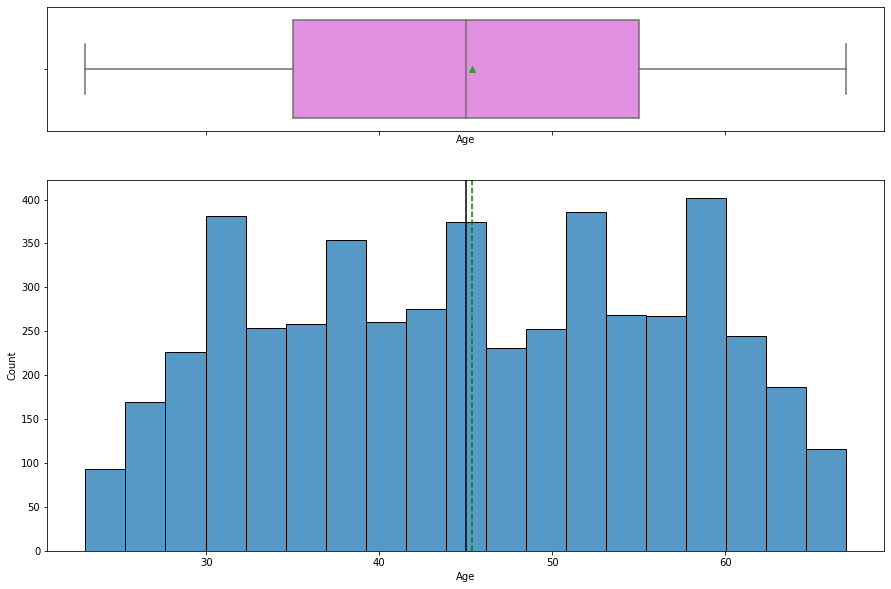

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Age")

### Comment:
* Age column is normally distributed with majority of customers falling between 30 to 60 years of age. Mean is almost equal to the median.

### Experience

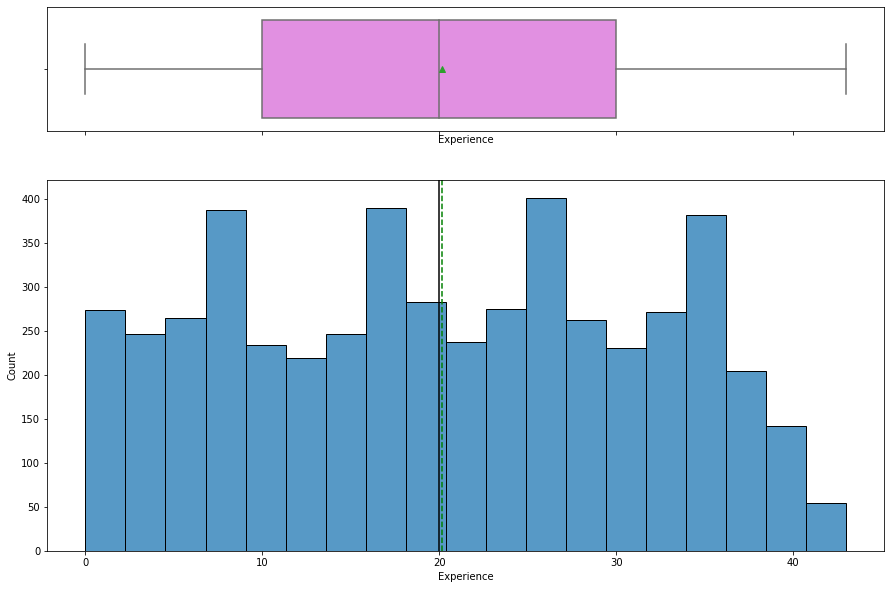

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Experience")

### Comment:
* Experience column also have a normal distribution with more customers having experience starting from 8 years. Mean is approximately equal to the median. 

### Income

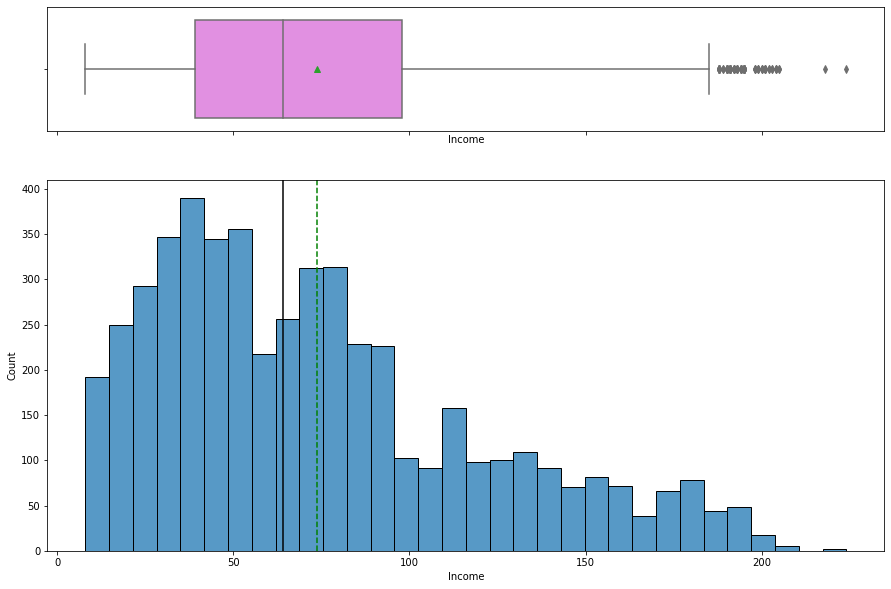

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Income")

### Comment:
* Income attribute is postively skewed. There are outliers at the higher scale end.
* Majority of the customers have income between 40k - 90k.

### CCAvg

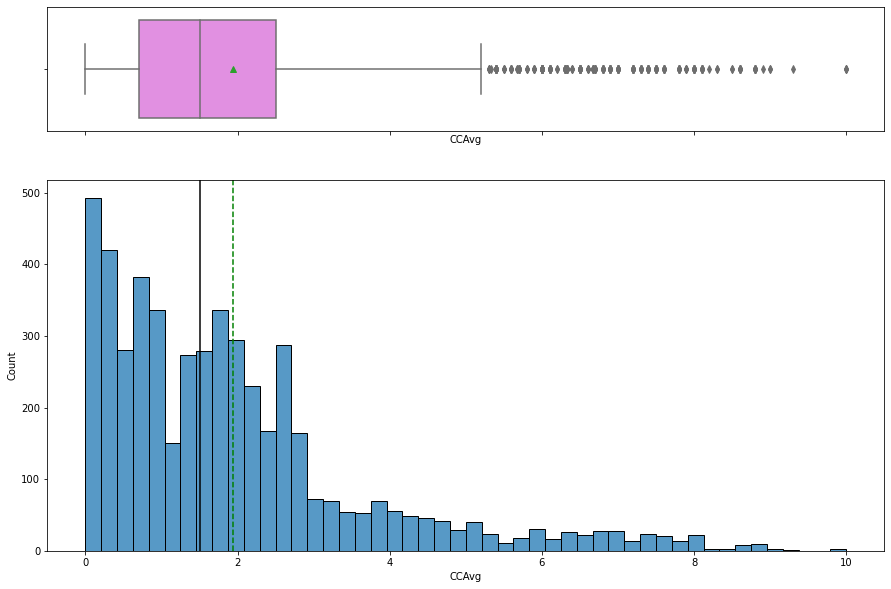

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data, "CCAvg")

### Comment:
* CCAvg attribute is right skewed. There are outliers at the higher scale end.
* Majority of customers spend less than 2.5k 

### Mortgage

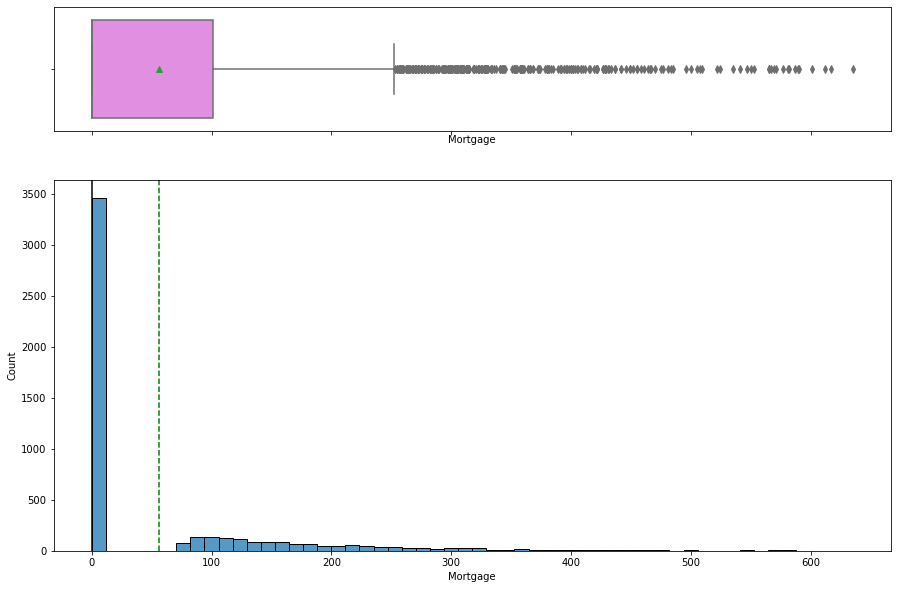

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Mortgage")

### Comment:
* 70% of the customers have either no mortgage or value less than 40K. 

### Univariate Analysis for Categorical Variable

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Family

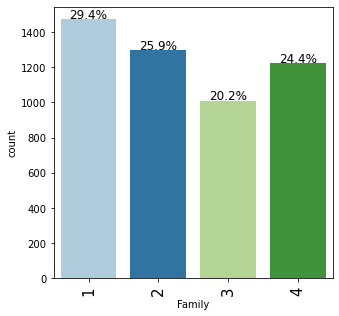

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Family", perc=True)

### Securities Account

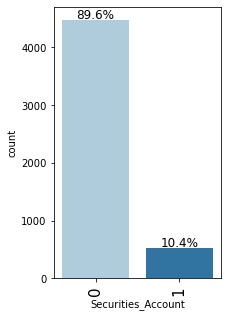

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "Securities_Account", perc=True)

### Personal Loan 

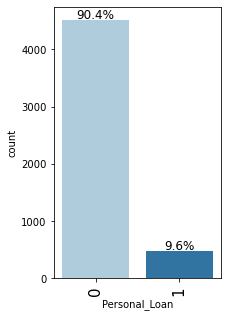

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "Personal_Loan", perc=True)

### CD_Account

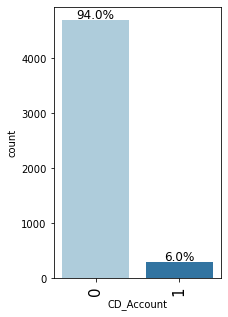

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "CD_Account", perc=True)

### Online

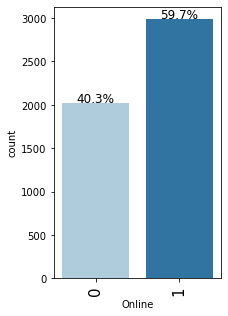

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "Online", perc=True)

### Credit Card

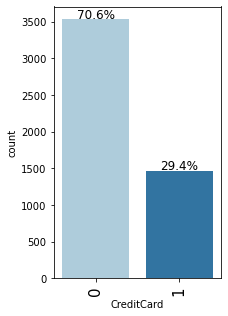

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "CreditCard", perc=True)

### Region

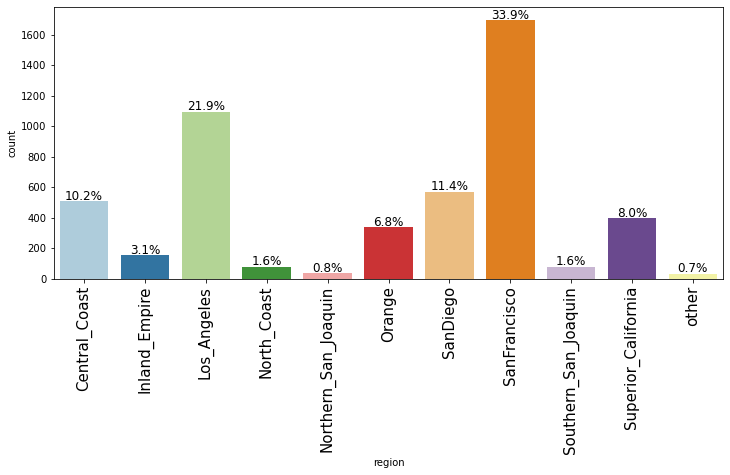

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "region", perc=True)

#### Comments: 
* Distribution of customers cut slightly even across the family size tiers with family of 1 having the highest proportion.
* We have more of undergraduates as customers who can qualify for personal loans.
* Majority of the customers (~90%) do not have security account with the bank.
* Bulk of the customers(~93%) do not have certificates of deposit with the bank.
* 59% of customers do use online banking as their preferred channel.
* Majority of customers (~70%) do not have credit cards with the bank.
* ~10% of customers have taken loan from the bank. There's huge opportunity in this regards.
* Bulk of the customers are located in Los Angeles and San Francisco Bay area.

### Bivariate Analysis

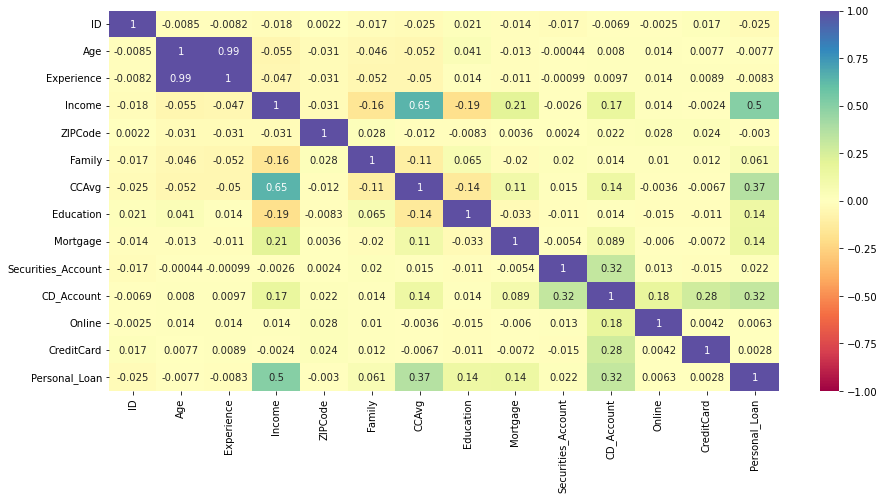

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Comments:
* Income, CC_Avg and CD_Account have maximum correlation with the target variable (Personal_Loan) in that order.
* Age and Experience are highly correlated and correlation is almost 1. Since Age has higher correlation factor than Experience in relation to the target variable, Experience can be dropped from the dataset during the data prep.
* Income and CC_Avg is moderately correlated.
* Mortgage and Income has moderate correlation of 12%.
* CD_Account has some level of association with Securities Account, Online, CreditCard and Personal Loan.
* Income influences CC_Avg, Mortgage, CD_Account and Personal Loan

<Figure size 1080x504 with 0 Axes>

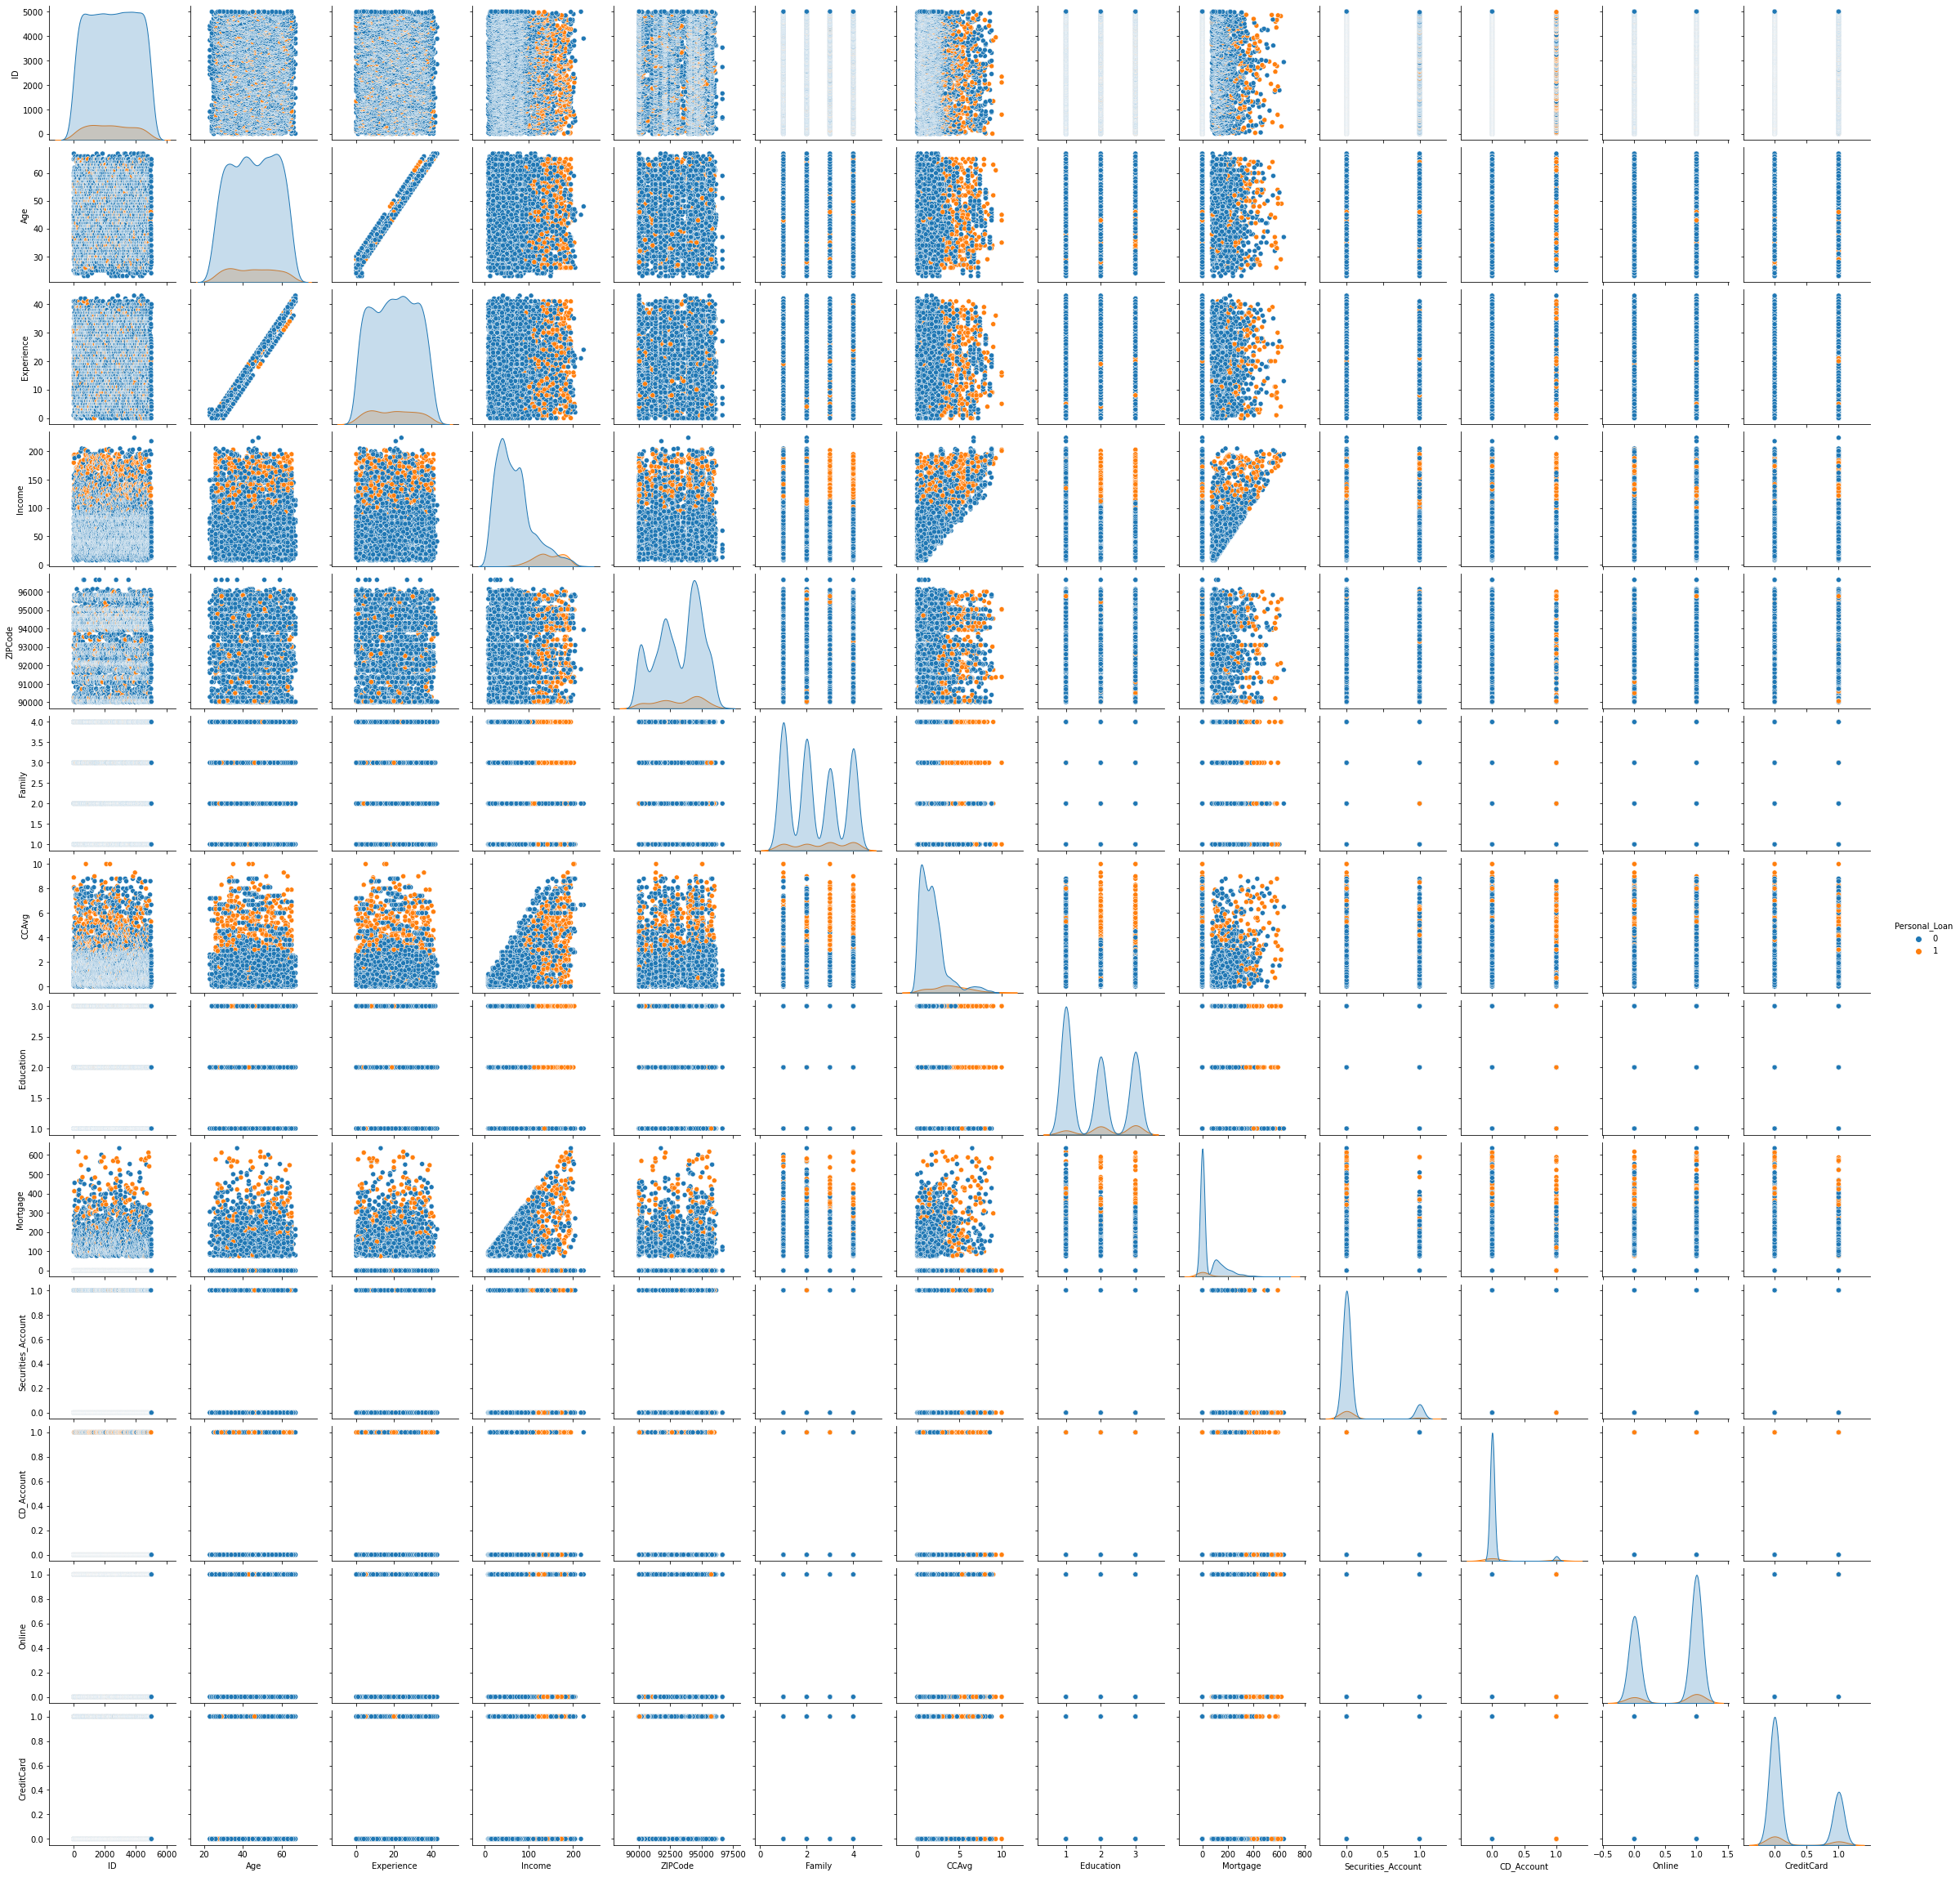

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.pairplot(data=data, hue="Personal_Loan")
plt.show()

#### Comments: 
* Individuals who have higher income tend to apply for loans. However, this tend to cuts across the age band.
* The higher the Experience, the higher the income.
* Individuals with higher CC_Avg tend to apply for loans.
* Individuals with higher tier of education level have higher income and tend to apply for loans.


### Checking the association of Personal_Loan with independent variables 

#### Influence of Income and CCAvg on Personal loan

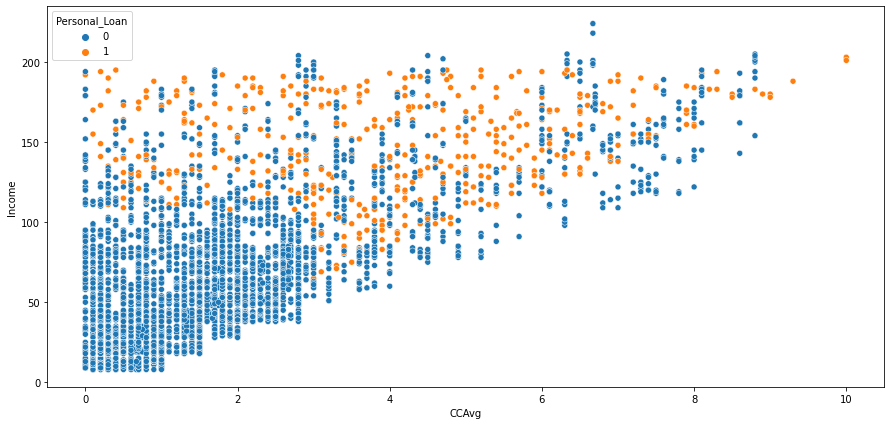

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="CCAvg", y="Income", hue="Personal_Loan", data=data)

#### Comments:
* Customers who have taken loans have higher income and CCAvg value. It simply means the higher the CCAvg and Income the more likely customers take up loans

#### Influence of Income and Mortgage on Personal loan 

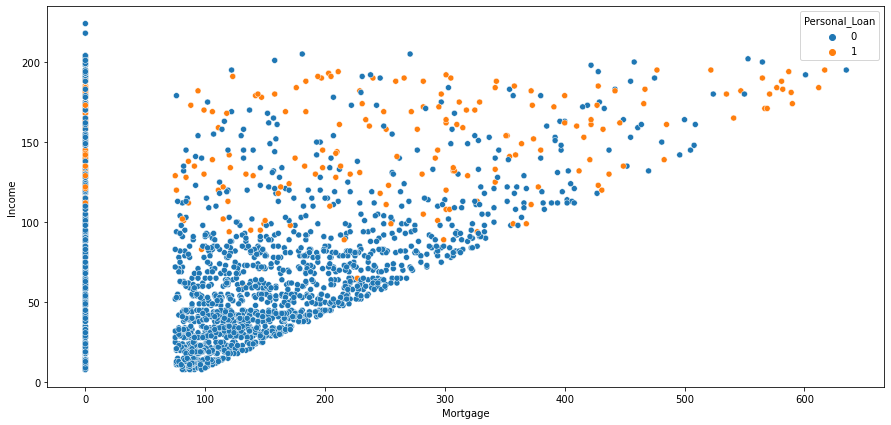

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Mortgage", y="Income", hue="Personal_Loan", data=data)

#### Comments:
* Customers who have taken loans have higher mortgage and income value. 


#### Customer Level Analysis : Education as reference

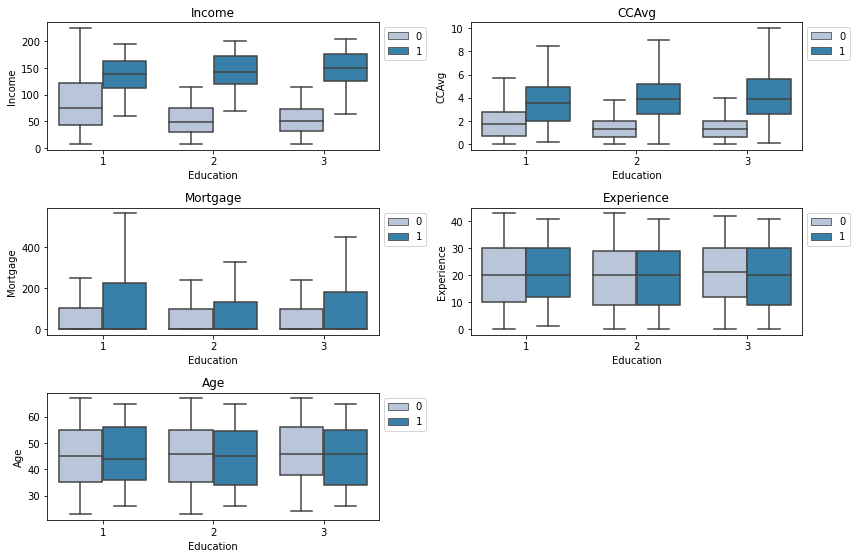

<IPython.core.display.Javascript object>

In [46]:
cols = data[
    [
        "Income",
        "CCAvg",
        "Mortgage",
        "Experience",
        "Age",
    ]
].columns.tolist()
plt.figure(figsize=(12, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        data["Education"],
        data[variable],
        hue=data["Personal_Loan"],
        palette="PuBu",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

#### Comments:
* Customers who took loan have same range of income irrespective of education level.
* Customers with education level of graduate and advanced/professional have higher chances of taking a loan.
* Customers of any education level but with high value of house mortgae, have higher chance of taking a loan compared to those of the same education level but with low house mortgage.


In [47]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


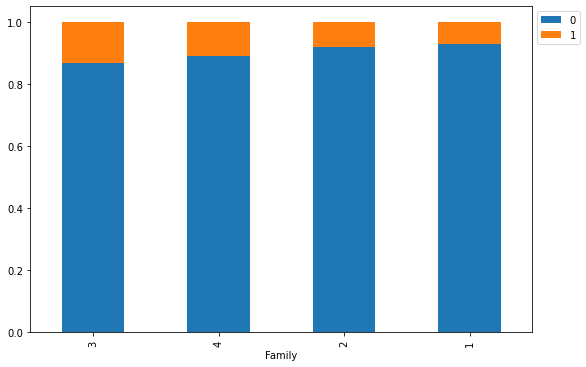

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Comments :
* Family of larger sizes have higher chances of taking up loans.

#### Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


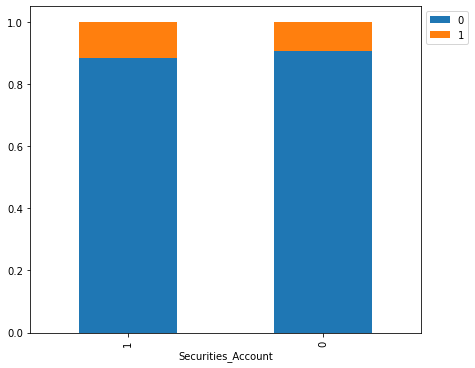

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

#### Comments :
* There is similar distribution of loan adoption for customers who have security accounts or not.

#### Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


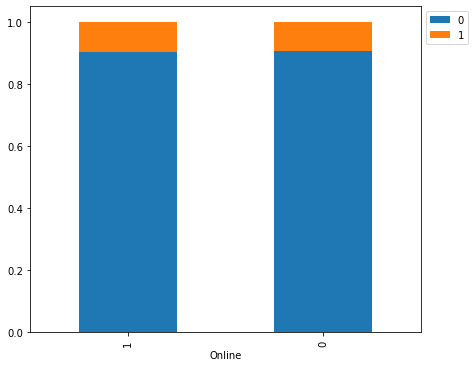

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "Online", "Personal_Loan")

#### Comments:
* Similar loan adoption rate for customer who use either online channel or not 

#### Personal Loan vs Region

Personal_Loan            0    1   All
region                               
All                   4520  480  5000
SanFrancisco          1529  167  1696
Los_Angeles            984  111  1095
SanDiego               512   59   571
Central_Coast          461   50   511
Superior_California    368   31   399
Orange                 309   30   339
Inland_Empire          148    9   157
North_Coast             70    9    79
Southern_San_Joaquin    71    9    80
other                   31    3    34
Northern_San_Joaquin    37    2    39
------------------------------------------------------------------------------------------------------------------------


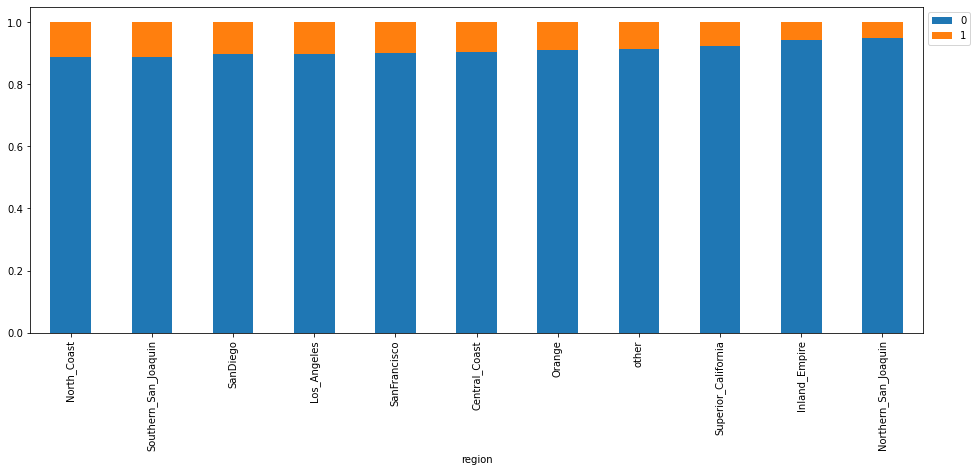

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "region", "Personal_Loan")

#### Comments:
* North Coast Region has the highest loan adoption rate.

#### Personal Loan vs Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


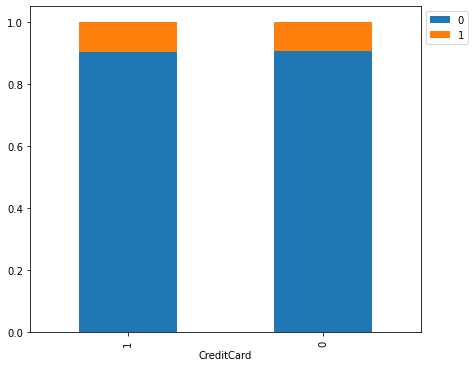

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

#### Comments:
* Similar loan adoption rate for customer with or without credit cards.

#### Personal Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


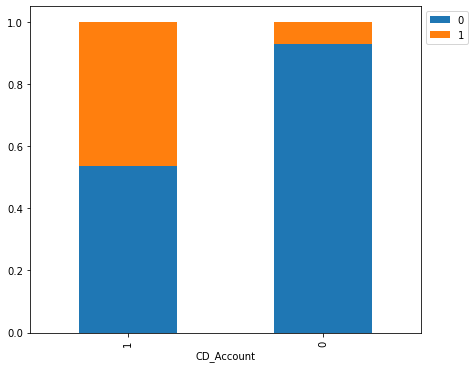

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

#### Comments:
* Customers with CD Account have higher chances of collecting loans. 

## Data Preprocessing

* Dropping of the Experience column due to high correlation with Age,ID for non-relevance, ZIPCode and County for derivation of the region column.
* Outlier Treatment(perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [54]:
## Dropping the Experience, ID, ZIPCode and County Columns
data.drop(["ID", "ZIPCode", "County", "Experience"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Outlier Detection using boxplot

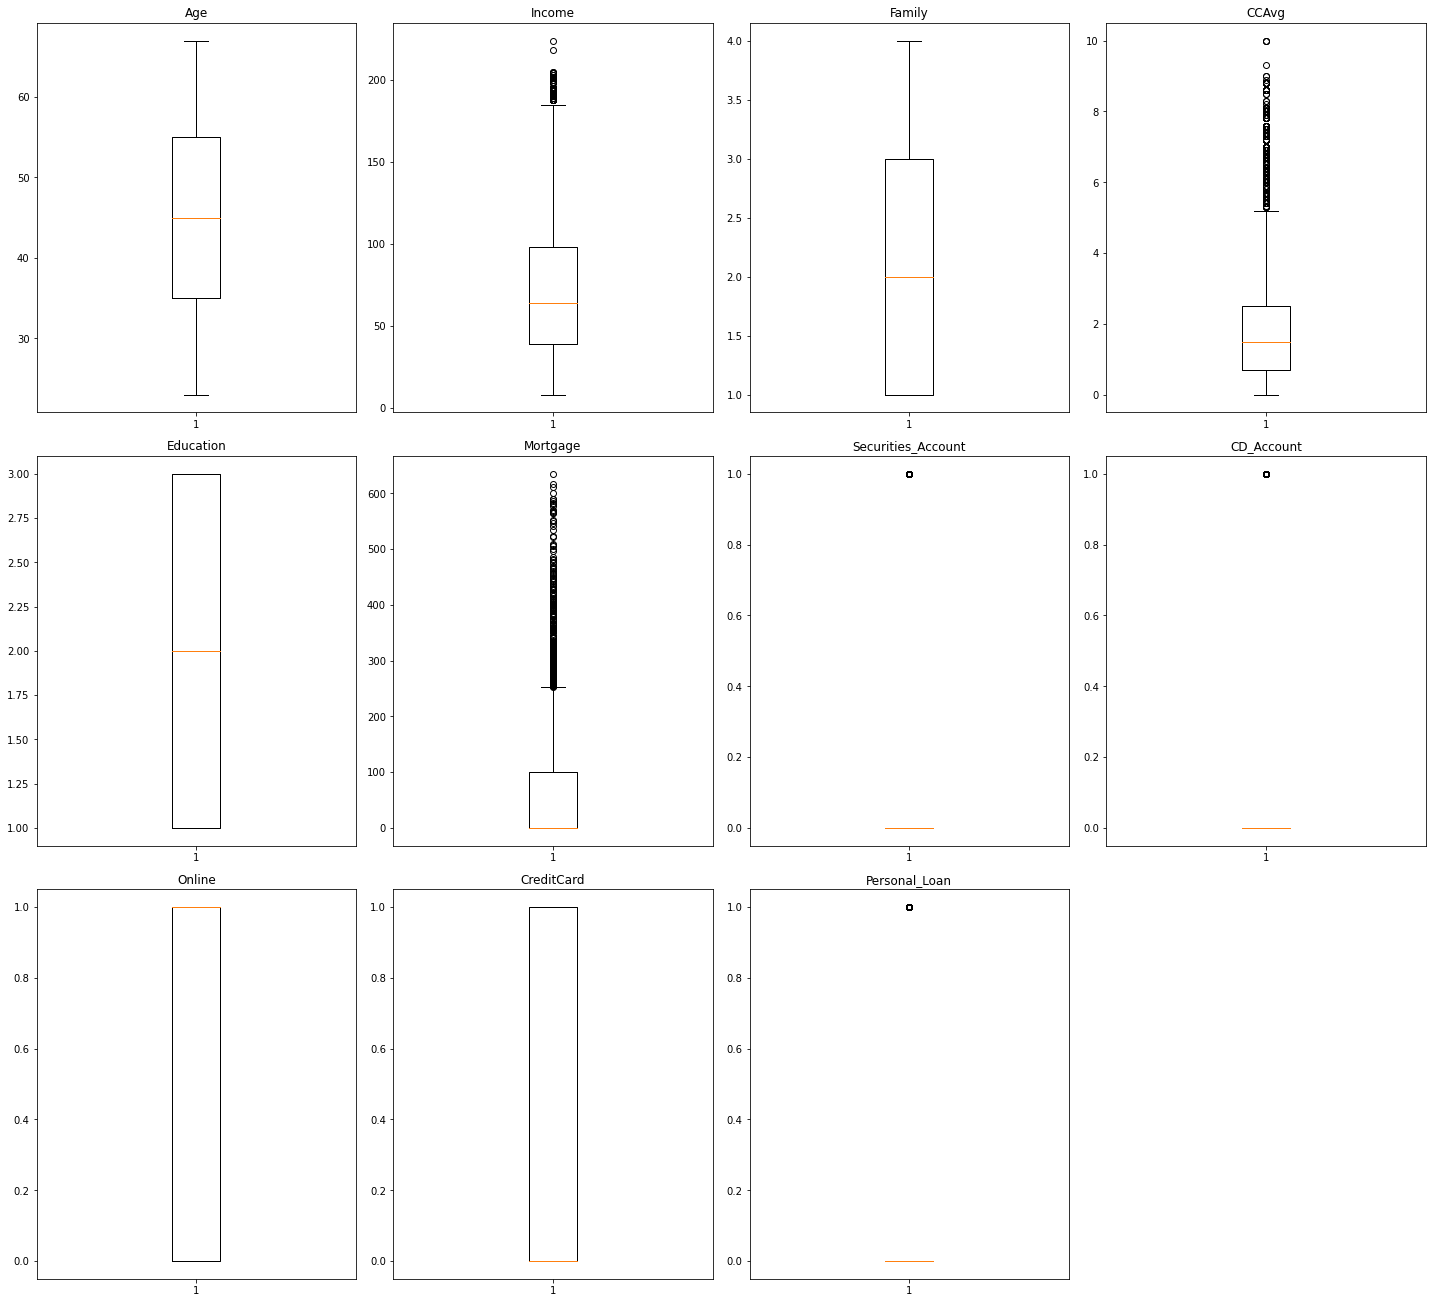

<IPython.core.display.Javascript object>

In [55]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Income, CCAvg and Mortgage have outliers at the upper scale end that needs to be treated.

### Outier Treatment

In [56]:
# functions to treat outliers by flooring and capping

# Applying the outlier treatment function and excluding the transformed variables and Year, mileage and seats.
p25 = data[["Income", "CCAvg", "Mortgage"]].quantile(0.25)  # Lower whisker boundary
p75 = data[["Income", "CCAvg", "Mortgage"]].quantile(0.75)  # Upper Whisker Boundary
data[["Income", "CCAvg", "Mortgage"]] = data[["Income", "CCAvg", "Mortgage"]].clip(
    p25, p75, axis=1
)  # outlier clipping

<IPython.core.display.Javascript object>

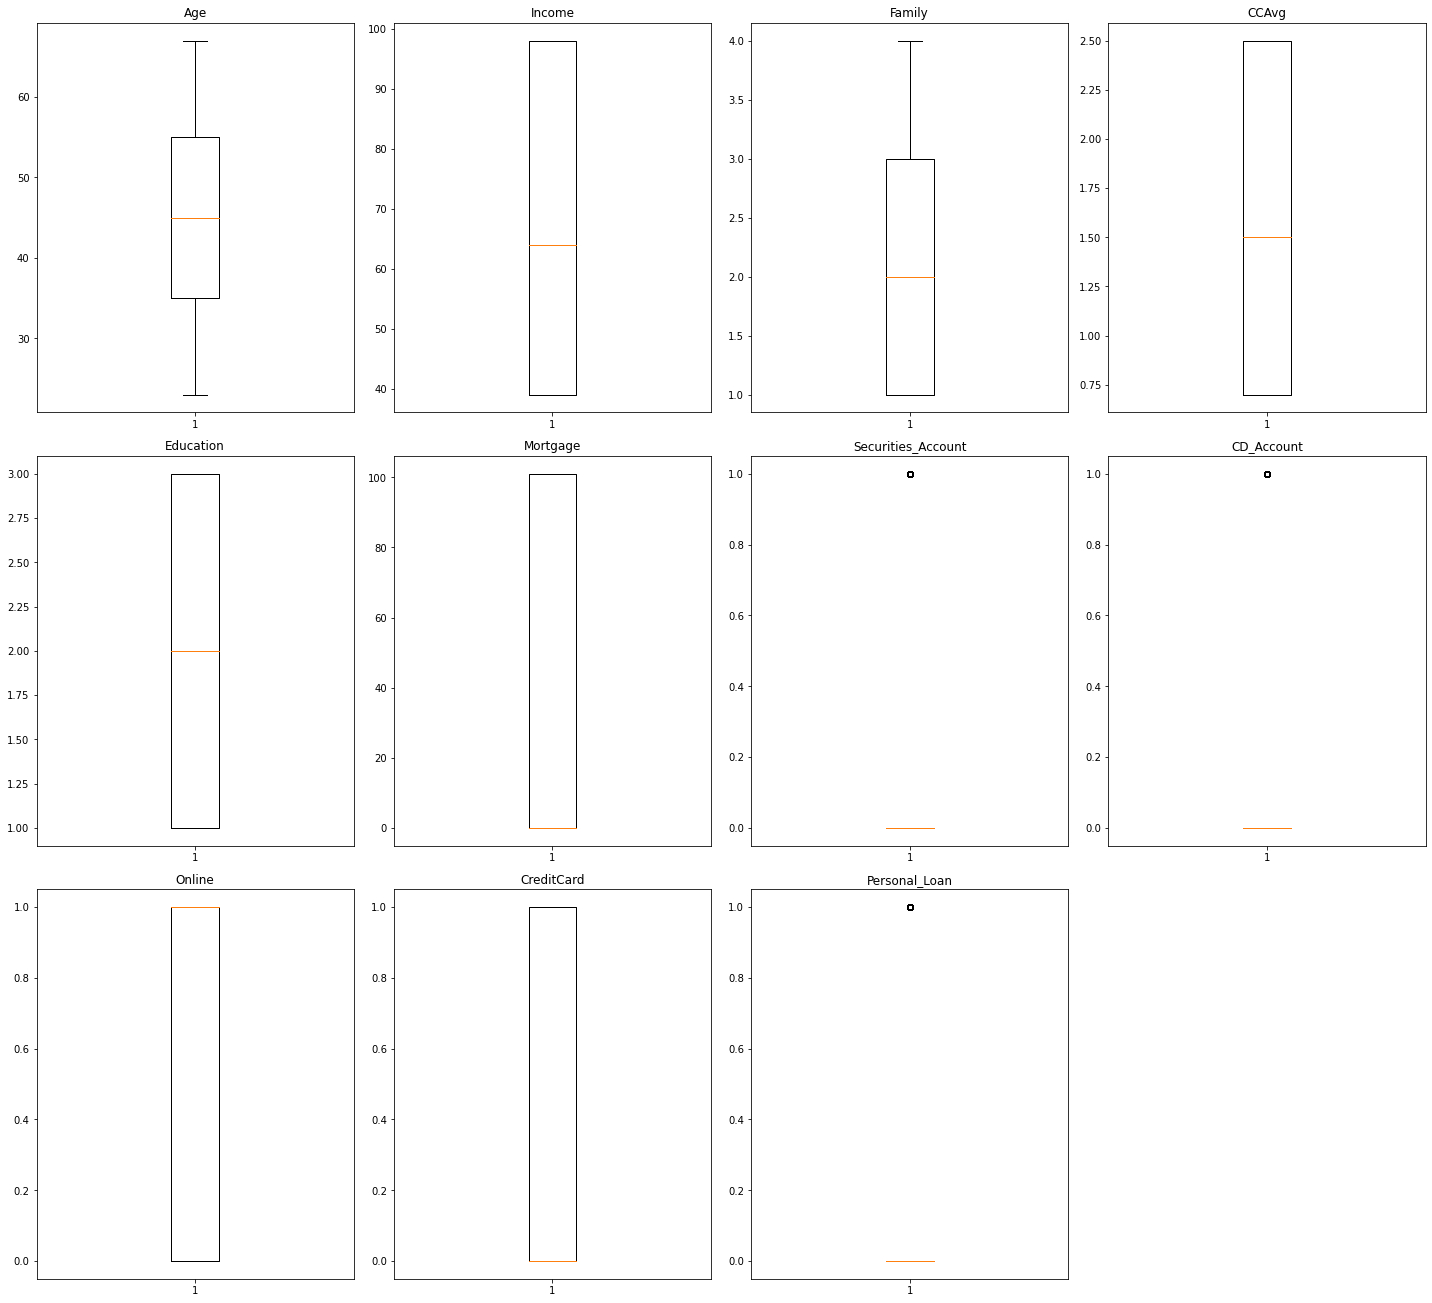

<IPython.core.display.Javascript object>

In [57]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preparation

In [58]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [59]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 20) (1500, 20)


<IPython.core.display.Javascript object>

In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [61]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

## Building the Model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an individual will accept a loan but in reality the individual did not accept the offered loan.-Loss of resources (FN)
2. Predicting an individual won't accept a loan but in reality the individual did accept a loan . -Loss of opportunity (FP)

### Which case is more important?
* If we predict an individual will accept a loan but actually the individual did not accept the loan - This is loss of resources as cost of the campaign would end up wasteful.  

### How to reduce this loss i.e need to reduce False Negatives?
*  `Recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives

#### Creating functions to  calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [62]:
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf



<IPython.core.display.Javascript object>

In [63]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression

In [64]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Finding the coefficients

In [65]:
coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age    Income    Family     CCAvg  Education  Mortgage  \
Coefficients  0.004284  0.253477  0.614186  0.933764   1.332353   0.00155   

              Securities_Account  CD_Account    Online  CreditCard  \
Coefficients           -1.040156    3.171093 -0.419706   -1.138302   

              region_Inland_Empire  region_Los_Angeles  region_North_Coast  \
Coefficients             -0.281038           -0.149574            0.364244   

              region_Northern_San_Joaquin  region_Orange  region_SanDiego  \
Coefficients                     0.085278      -0.183668        -0.218431   

              region_SanFrancisco  region_Southern_San_Joaquin  \
Coefficients            -0.177906                     0.116585   

              region_Superior_California  region_other  Intercept  
Coefficients                   -0.147851       0.03214 -30.988295

<IPython.core.display.Javascript object>

#### Coefficient of Interpretations

* Coefficient of Age, Income, Family,CCAvg,Education,Mortgage, CD_Accounts and  some regions are positive, an increase in these will lead to increases in chances of a person to accept a loan.
* Coefficient of Securities_Account, Online, CreditCard and some regions as negative, an increase in these will lead to decrease of chances of a person to accept a loan.

#### Converting Coefficient to Odds

In [66]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age     Income     Family       CCAvg   Education  Mortgage  \
Odds         1.004294   1.288498   1.848151    2.544068    3.789951  1.001552   
Change_odd%  0.429352  28.849836  84.815071  154.406767  278.995100  0.155153   

             Securities_Account   CD_Account     Online  CreditCard  \
Odds                    0.35340    23.833524   0.657240    0.320362   
Change_odd%           -64.66003  2283.352434 -34.275973  -67.963758   

             region_Inland_Empire  region_Los_Angeles  region_North_Coast  \
Odds                      0.75500            0.861075            1.439425   
Change_odd%             -24.50002          -13.892550           43.942512   

             region_Northern_San_Joaquin  region_Orange  region_SanDiego  \
Odds                            1.089019       0.832212         0.803779   
Change_odd%                     8.901937     -16.778783       -19.622099   

             region_SanFrancisco  region_Southern_San_Joaquin  \
Odds                    0.837021                     1.123653   
Change_odd%           -16.297911                    12.365289   

             region_Superior_California  region_other  
Odds                           0.862559      1.032662  
Change_odd%                  -13.744071      3.266202

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Age`: Holding all other features constant a 1 unit change in Age will increase the odds of a person to accept a loan by 1 times or a 0.43% increase in odds of accepting a loan.
* `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a person to accept a loan by 1.3 times or a 28.8% increase in odds of accepting a loan.
* `Family`: Holding all other features constant a 1 unit change in Family will increase the odds of a person to accept a loan by 1.8 times or a 84.8% increase in odds of accepting a loan.
* `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a person to accept a loan by 2.5 times or a 154% increase in odds of accepting a loan.
* `Education`: Holding all other features constant a 1 unit change in Education will increase the odds of a person to accept a loan by 3.8 times or a 278% increase in odds of accepting a loan.
* `Mortgage`: Holding all other features constant a 1 unit change in Mortgage will increase the odds of a person to accept a loan by 1 times or a 0.15% increase in odds of accepting a loan.
* `Securities Account`: Holding all other features constant a 1 unit change in Securities Account will increase the odds of a person to accept a loan by 0.35 times but will have a 64% decrease in odds of accepting a loan.
* `CD Account`: Holding all other features constant a 1 unit change in CD Account will increase the odds of a person to accept a loan by 23.8 times or a 2283% increase in odds of accepting a loan.
* `Online`: Holding all other features constant a 1 unit change in Online will increase the odds of a person to accept a loan by 0.65 times but will have a 34% decrease in odds of accepting a loan.
* `CreditCard`: Holding all other features constant a 1 unit change in CreditCard will increase the odds of a person to accept a loan by 0.32 times but will have a 68% decrease in odds of accepting a loan.
* `Regional_tier` : Holding all other features constant a 1 unit change will follow same interpretations based on the odd and change_odd% values. 

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on training set

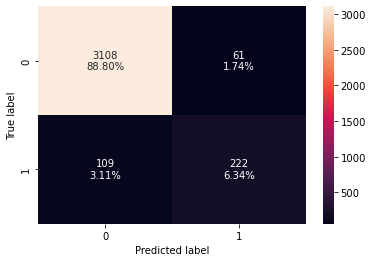

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [68]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.951429  0.670695   0.784452  0.723127

<IPython.core.display.Javascript object>

#### Checking model performance on testing set 

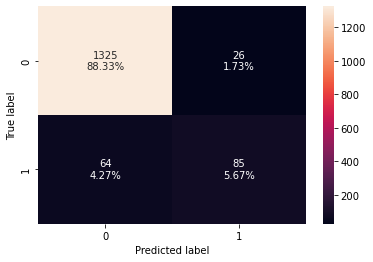

<IPython.core.display.Javascript object>

In [69]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [70]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy   Recall  Precision        F1
0      0.94  0.57047   0.765766  0.653846

<IPython.core.display.Javascript object>

#### ROC-AUC 

* ROC-AUC on training set 

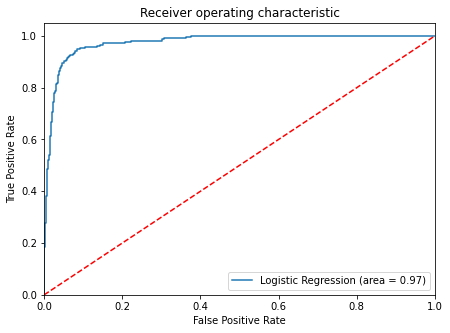

<IPython.core.display.Javascript object>

In [71]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC- AUC on testing set

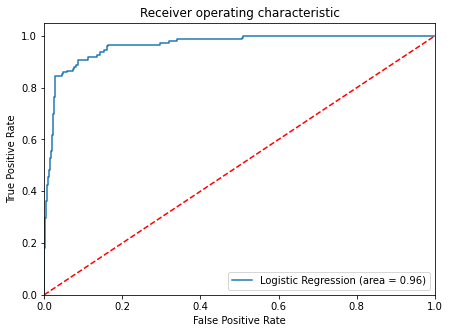

<IPython.core.display.Javascript object>

In [72]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC Score for both training and testing set are high, showing we have a good model classifier.
* Model shows no signs of overfitting or underfitting, however, there's need to optimize the recall metric so as to minimize the False Negatives.

### Model Performance Improvement

* Let's see if the Recall score and other metrics can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [73]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13666476948015938


<IPython.core.display.Javascript object>

#### Checking model performance on training set

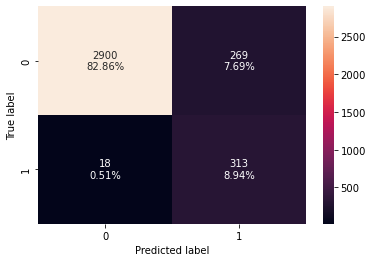

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0     0.918  0.945619   0.537801  0.685652

<IPython.core.display.Javascript object>

#### Checking model performance on testing set

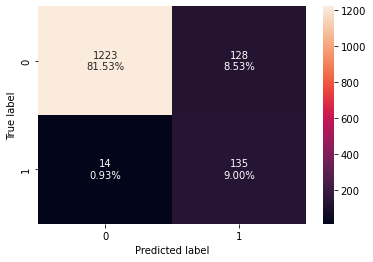

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy   Recall  Precision       F1
0  0.905333  0.90604   0.513308  0.65534

<IPython.core.display.Javascript object>

* Recall value for both training and testing set increased signifcantly. However,Precision and F1 score declined.
* There is need to find a better threshold so as to have improve evaluation metric while keeping the recall metric in mind.

##### Let's use Precision-Recall curve and see if we can find a better threshold

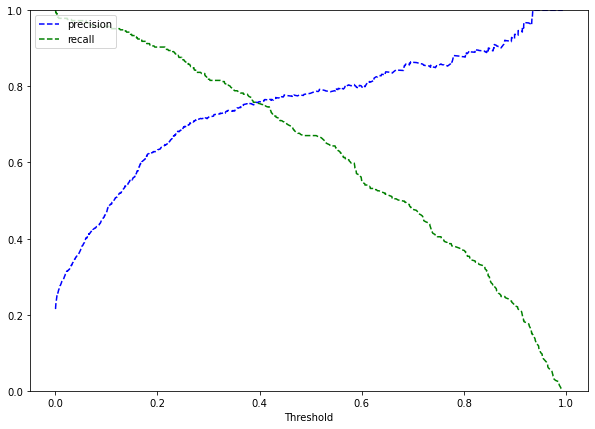

<IPython.core.display.Javascript object>

In [78]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.38, we get balanced recall and precision.

In [79]:
# setting the threshold
optimal_threshold_curve = 0.38

<IPython.core.display.Javascript object>

#### Checking performance of training set

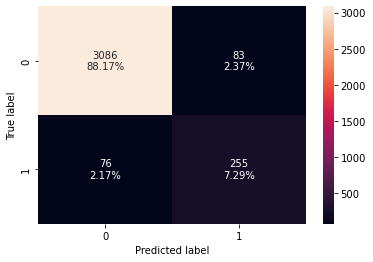

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [81]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.954571  0.770393   0.754438  0.762332

<IPython.core.display.Javascript object>

#### Checking model performance of test set

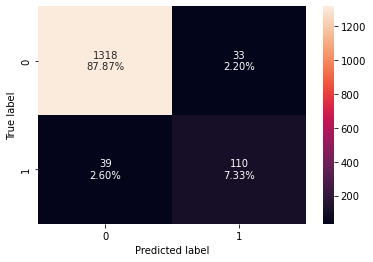

<IPython.core.display.Javascript object>

In [82]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [83]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0     0.952  0.738255   0.769231  0.753425

<IPython.core.display.Javascript object>

* At the threshold value of 0.38, value for both Recall and Precision is balanced
* Generalized model attained also attained.

### Model Performance Summary

In [84]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.38 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.951429                            0.918000   
Recall                        0.670695                            0.945619   
Precision                     0.784452                            0.537801   
F1                            0.723127                            0.685652   

           Logistic Regression-0.38 Threshold  
Accuracy                             0.954571  
Recall                               0.770393  
Precision                            0.754438  
F1                                   0.762332

<IPython.core.display.Javascript object>

In [85]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.38 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.940000                            0.905333   
Recall                        0.570470                            0.906040   
Precision                     0.765766                            0.513308   
F1                            0.653846                            0.655340   

           Logistic Regression-0.38 Threshold  
Accuracy                             0.952000  
Recall                               0.738255  
Precision                            0.769231  
F1                                   0.753425

<IPython.core.display.Javascript object>

### Conclusion For Logistic Regression
*  I have been able to build a predictive model that can be used by the bank to acquire customers to accept loans
*  Without improving the model metrics, the area in ROC curve of 0.96 which is close to 1 shows the model has a good classifier.
* Coefficient of Age, Income, Family,CCAvg,Education,Mortgage, CD_Accounts and some regions are positive, an increase in these will lead to increases in chances of a person to accept a loan. 
* Coefficient of Securities_Account, Online, CreditCard and some regions as negative, an increase in these will lead to decrease of chances of a person to accept a loan.
* Using the Precision Recall curve threshold method, recall value was improved significantly from 0.57 to 0.74 on the test set.

## Decision Tree Model

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [90]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [91]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

<IPython.core.display.Javascript object>

In [92]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model on training set

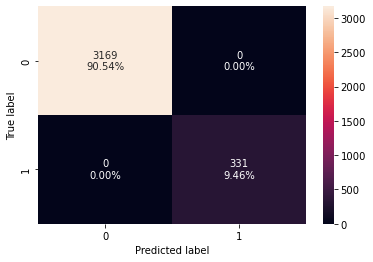

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(model, X_train, y_train)

In [94]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

<IPython.core.display.Javascript object>

#### Checking model performance on test set

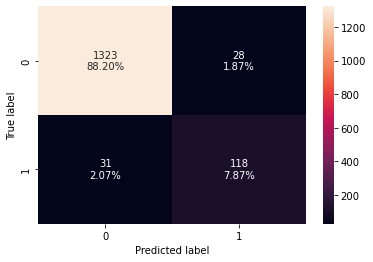

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(model, X_test, y_test)

In [96]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision   F1
0  0.960667  0.791946   0.808219  0.8

<IPython.core.display.Javascript object>

* There is a slight disparity in performance of model on training set and test set, which suggests that the model is showing signs overfiiting.
* Trees built needs pruning.

### Visualize the Decision Tree

In [98]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'region_Inland_Empire', 'region_Los_Angeles', 'region_North_Coast', 'region_Northern_San_Joaquin', 'region_Orange', 'region_SanDiego', 'region_SanFrancisco', 'region_Southern_San_Joaquin', 'region_Superior_California', 'region_other']


<IPython.core.display.Javascript object>

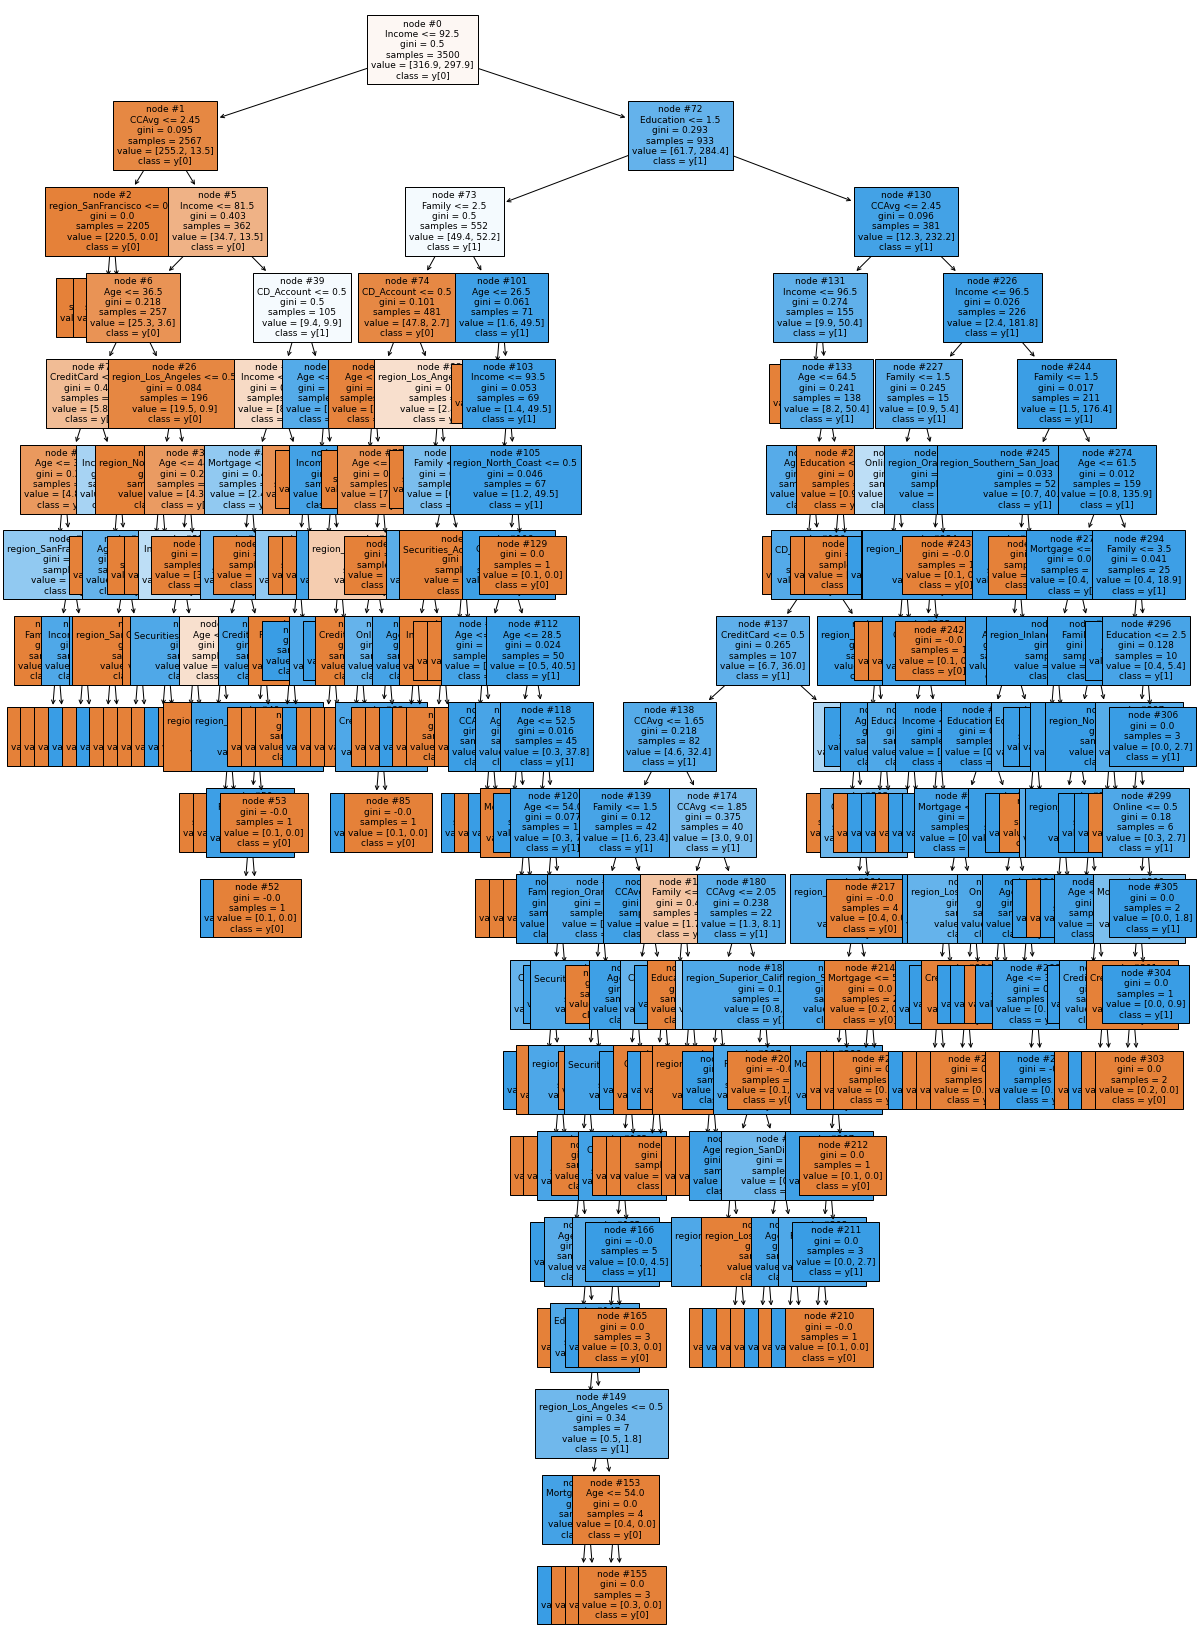

<IPython.core.display.Javascript object>

In [99]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [100]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.45
|   |   |--- region_SanFrancisco <= 0.50
|   |   |   |--- weights: [143.40, 0.00] class: 0
|   |   |--- region_SanFrancisco >  0.50
|   |   |   |--- weights: [77.10, 0.00] class: 0
|   |--- CCAvg >  2.45
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |   |--- weights: [4.40, 0.00] class: 0
|   |   |   |   |   |--- Age >  35.50
|   |   |   |   |   |   |--- region_SanFrancisco <= 0.50
|   |   |   |   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.20, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  2.50
|   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |--- region_SanFrancisco >  0.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.10, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

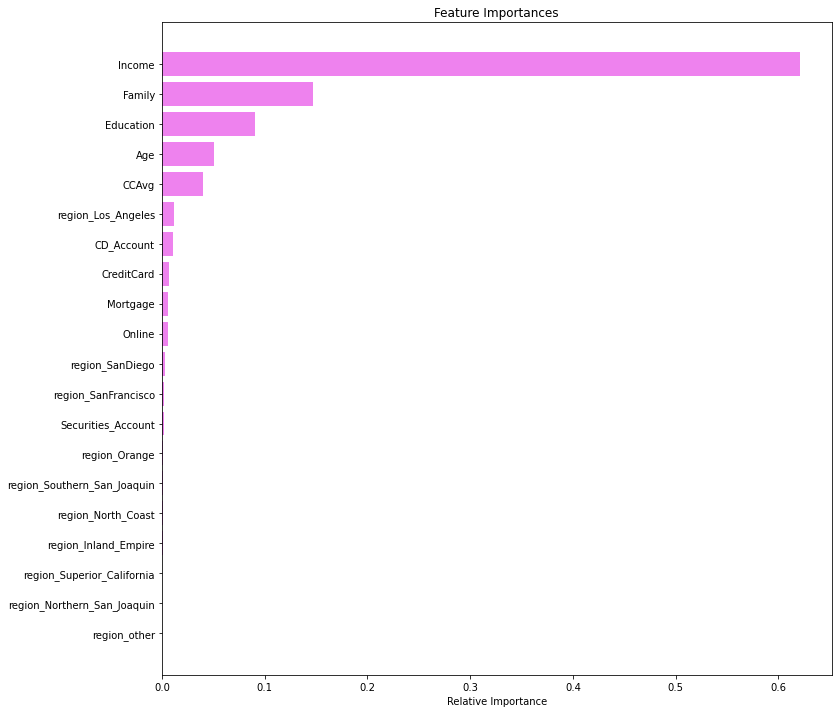

<IPython.core.display.Javascript object>

In [101]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting loan acceptance.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more and reduce overfitting.

In [102]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-05, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

#### Checking model performace on the training set

In [103]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.970857  0.879154   0.824363  0.850877

<IPython.core.display.Javascript object>

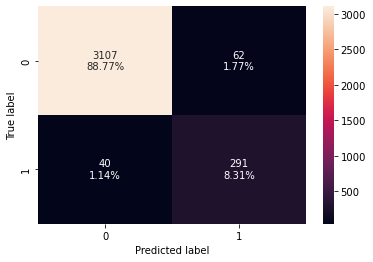

<IPython.core.display.Javascript object>

In [104]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Checking model performance on testing set

In [105]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.962667  0.805369   0.816327  0.810811

<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

### Visualizing the Decision Tree

In [106]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

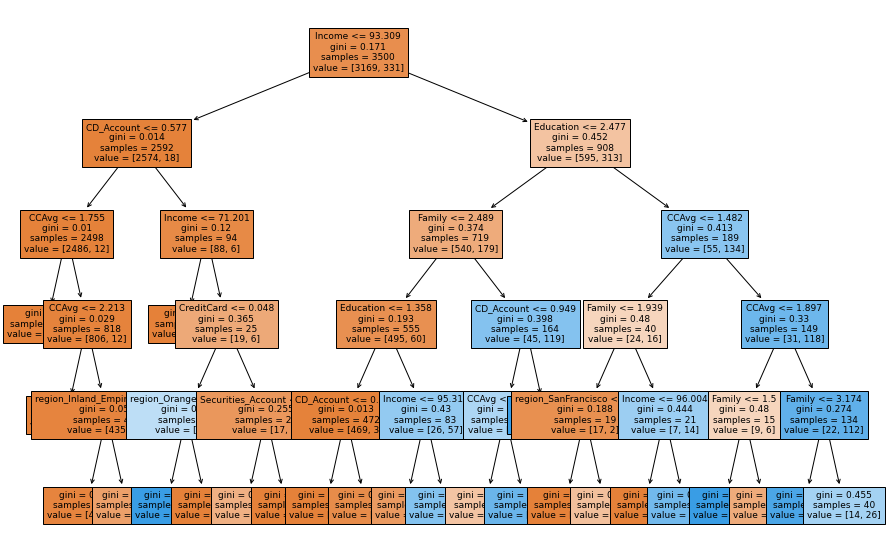

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* Tree built is much more simpler and overfitting has been treated

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                  Imp
Income                       0.365861
Education                    0.290374
Family                       0.246979
CCAvg                        0.061362
CD_Account                   0.021252
region_Orange                0.005415
CreditCard                   0.003655
region_SanFrancisco          0.002058
Securities_Account           0.001661
region_Inland_Empire         0.001384
region_Superior_California   0.000000
region_Southern_San_Joaquin  0.000000
region_SanDiego              0.000000
Age                          0.000000
region_Northern_San_Joaquin  0.000000
region_North_Coast           0.000000
region_Los_Angeles           0.000000
Online                       0.000000
Mortgage                     0.000000
region_other                 0.000000


<IPython.core.display.Javascript object>

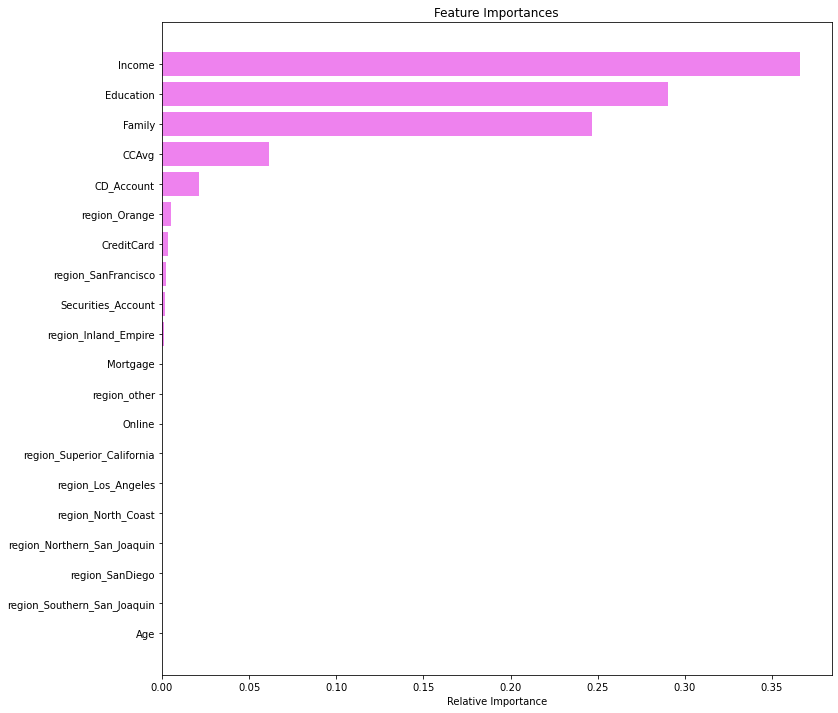

<IPython.core.display.Javascript object>

In [111]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Education and Family are the top 3 strong predictors to determine if a customer will accept a loan or not.

### Cost Complexity Pruning

In [112]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [113]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000114    0.000570
2     0.000177    0.001101
3     0.000183    0.001648
4     0.000184    0.002752
5     0.000206    0.005013
6     0.000260    0.005532
7     0.000260    0.006052
8     0.000267    0.006585
9     0.000269    0.007123
10    0.000274    0.007671
11    0.000293    0.008256
12    0.000327    0.009236
13    0.000364    0.011420
14    0.000392    0.011812
15    0.000400    0.012611
16    0.000404    0.018671
17    0.000429    0.019528
18    0.000429    0.019957
19    0.000429    0.020814
20    0.000433    0.021247
21    0.000478    0.021725
22    0.000483    0.024621
23    0.000490    0.025110
24    0.000514    0.025625
25    0.000532    0.026689
26    0.000551    0.027240
27    0.000572    0.028956
28    0.000580    0.029536
29    0.000701    0.030238
30    0.000714    0.032380
31    0.000762    0.033142
32    0.000770    0.035452
33    0.001065    0.039713
34    0.001134    0.040846
35    0.001575    0.043996
36    0.002761    0.046756
37    0.013046    0.059802
38    0.021735    0.081537
39    0.044859    0.171255

<IPython.core.display.Javascript object>

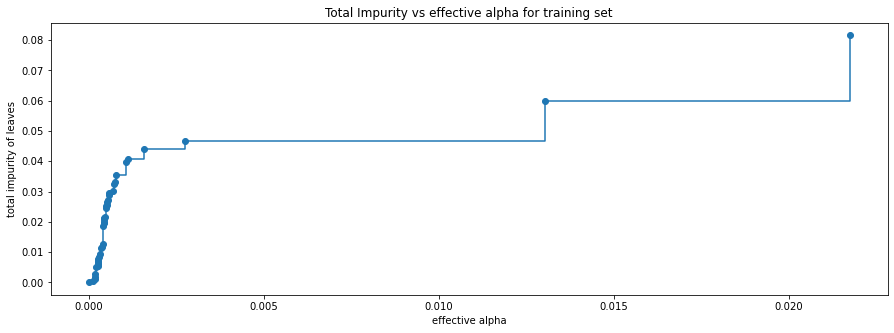

<IPython.core.display.Javascript object>

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [115]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04485893689662376


<IPython.core.display.Javascript object>

Removing the last element in 
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

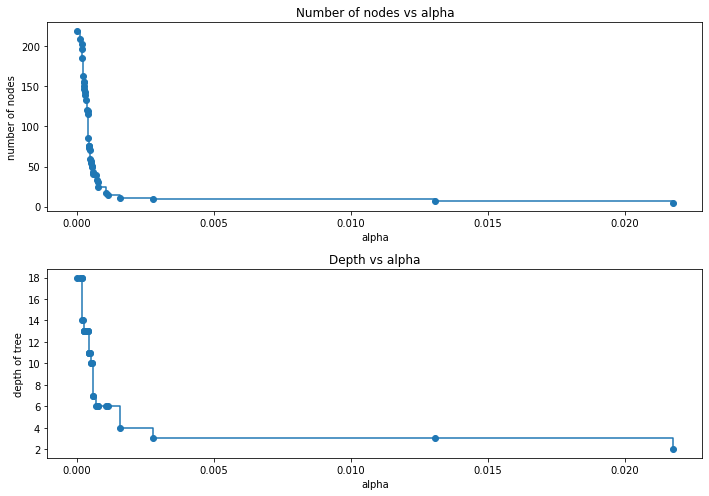

<IPython.core.display.Javascript object>

In [116]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [117]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [118]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

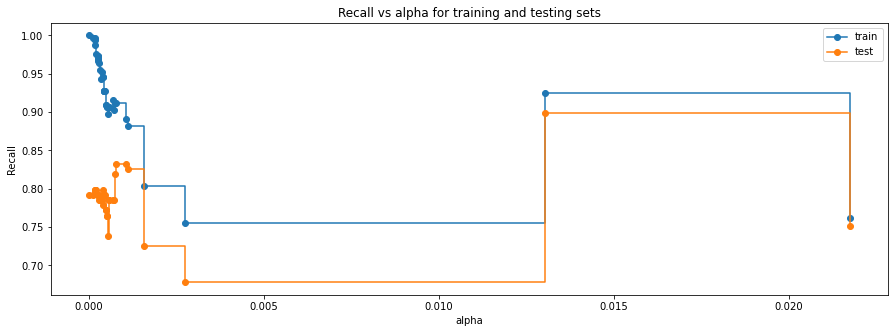

<IPython.core.display.Javascript object>

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01304634457442309, random_state=1)


<IPython.core.display.Javascript object>

#### Checking the model performance on training set

In [121]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.961714  0.924471   0.737349  0.820375

<IPython.core.display.Javascript object>

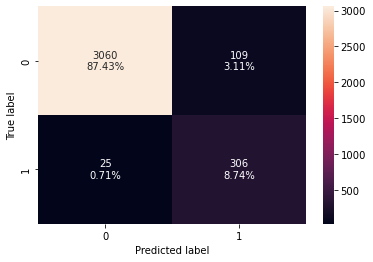

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking the model performance on the testing set

In [123]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision       F1
0  0.959333  0.899329   0.744444  0.81459

<IPython.core.display.Javascript object>

* A more generalized model performance on both training and test set compared to pre-pruning method
* The recall has improved further.

### Visualizing the Decision Tree

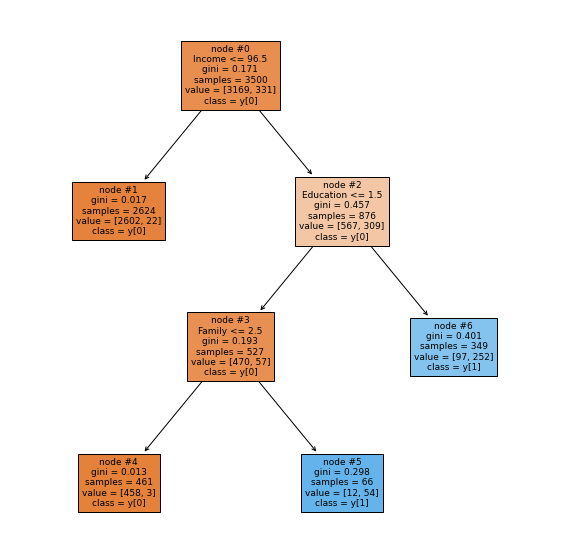

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 96.50
|   |--- weights: [2602.00, 22.00] class: 0
|--- Income >  96.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [458.00, 3.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [12.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [97.00, 252.00] class: 1



<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                  Imp
Education                    0.405698
Income                       0.399287
Family                       0.195015
Age                          0.000000
region_North_Coast           0.000000
region_Superior_California   0.000000
region_Southern_San_Joaquin  0.000000
region_SanFrancisco          0.000000
region_SanDiego              0.000000
region_Orange                0.000000
region_Northern_San_Joaquin  0.000000
region_Inland_Empire         0.000000
region_Los_Angeles           0.000000
CreditCard                   0.000000
Online                       0.000000
CD_Account                   0.000000
Securities_Account           0.000000
Mortgage                     0.000000
CCAvg                        0.000000
region_other                 0.000000


<IPython.core.display.Javascript object>

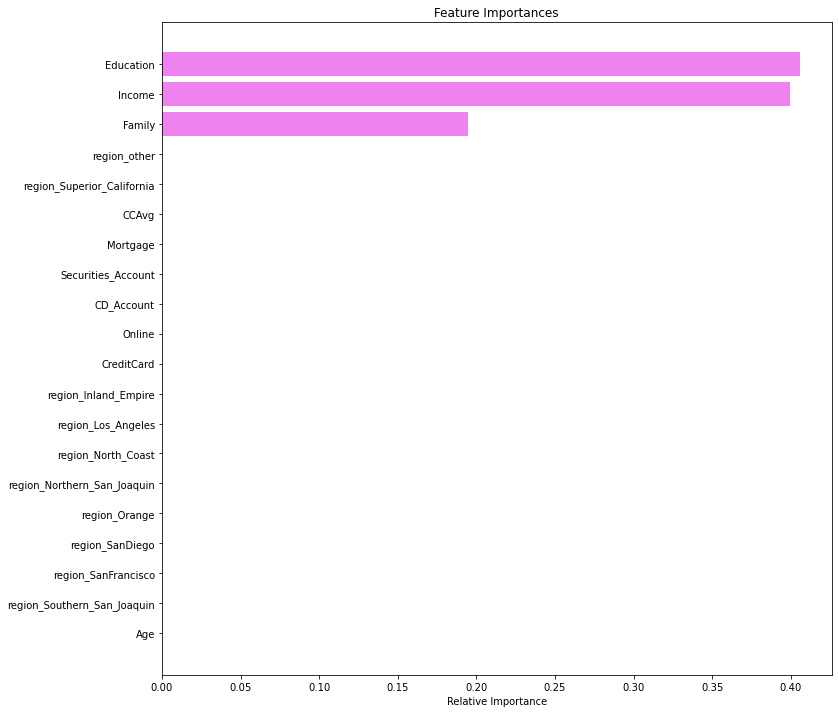

<IPython.core.display.Javascript object>

In [127]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education came out tops for the post pruning method while income and Family like the pre-pruning area also significant predictors.

### Comparing all the Decision Tree Models

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.970857   
Recall                       1.0                     0.879154   
Precision                    1.0                     0.824363   
F1                           1.0                     0.850877   

           Decision Tree (Post-Pruning)  
Accuracy                       0.961714  
Recall                         0.924471  
Precision                      0.737349  
F1                             0.820375

<IPython.core.display.Javascript object>

In [129]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.960667                     0.962667   
Recall                  0.791946                     0.805369   
Precision               0.808219                     0.816327   
F1                      0.800000                     0.810811   

           Decision Tree (Post-Pruning)  
Accuracy                       0.959333  
Recall                         0.899329  
Precision                      0.744444  
F1                             0.814590

<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

### Comparing all the models for Logistic Regression and Decision Tree Models

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.38 Threshold",
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.951429                            0.918000   
Recall                        0.670695                            0.945619   
Precision                     0.784452                            0.537801   
F1                            0.723127                            0.685652   

           Logistic Regression-0.38 Threshold  Decision Tree sklearn  \
Accuracy                             0.954571                    1.0   
Recall                               0.770393                    1.0   
Precision                            0.754438                    1.0   
F1                                   0.762332                    1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.970857                      0.961714  
Recall                        0.879154                      0.924471  
Precision                     0.824363                      0.737349  
F1                            0.850877                      0.820375

<IPython.core.display.Javascript object>

In [132]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14 Threshold",
    "Logistic Regression-0.38 Threshold",
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression sklearn  Logistic Regression-0.14 Threshold  \
Accuracy                      0.940000                            0.905333   
Recall                        0.570470                            0.906040   
Precision                     0.765766                            0.513308   
F1                            0.653846                            0.655340   

           Logistic Regression-0.38 Threshold  Decision Tree sklearn  \
Accuracy                             0.952000               0.960667   
Recall                               0.738255               0.791946   
Precision                            0.769231               0.808219   
F1                                   0.753425               0.800000   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.962667                      0.959333  
Recall                        0.805369                      0.899329  
Precision                     0.816327                      0.744444  
F1                            0.810811                      0.814590

<IPython.core.display.Javascript object>

## Overall Conclusion/ Insights:

* The aim of the ALLLife bank is to convert there liability customers into loan customers. Decision Tree algorithm have the highest recall rate to minimize the False Negative, all other performance metrics are also suited with decision trees when compared with Logistic Regression.
* Income, Family and Education level of customers are the strongest predictors for converting liability customers into loan customers.
* The model built can be used to predict if a customer will accept a loan or not.
* The importance of hyper-parameters/ pruning to reduce overfitting was duly established.
* Income influences other predictors such as CCAvg, Mortgage, CD_Account and personal loan.


## Recommendations

* For AllLife Bank to increase the conversions of liability customers into loan customers, campaign profile for customers should include the following : Customers with higher education, who owns CD Account, does not have securities account , does not have credit card and higher income greater than >55k.
* Family with size of 3 at the minimum, with mortgage value and higher income can also be targeted for higher conversions.
* Individuals with high income in North_Coast and Southern San Joaquin regions can also be targeted to increase conversion of customer to accept loan.
* For better resource management, Banks should consider strong predictors of income, education level, family size to create campaign artifacts.
* Going forward, bank management should strategically acquire potential customers who have all the required element of good income, education, family size so as to reduce the volume of liability customers and easily make money from loan interests.